# Sector Mappings

To generate sector allocation plots in the positions tearsheet and PnL by sector in the round trips tearsheet, you must pass pyfolio a dictionary (or dict-like data struction) of symbol-sector mappings, where symbols are keys and sectors are values. `create_full_tearsheet` will also take symbol-sector mappings as keyword argument `sector_mappings`.

In [1]:
%matplotlib inline
import pyfolio as pf
import gzip
import os
import pandas as pd

In [2]:
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=0)
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=0)
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]

In [3]:
returns.index = returns.index.tz_localize("UTC")
positions.index = positions.index.tz_localize("UTC")
transactions.index = transactions.index.tz_localize("UTC")

In [4]:
positions.head(2)

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.07875,7282.266152,21264.55188,7091.080020,21259.33389,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.25000,17675.836401,10804.31924,10685.411865,17872.47748,10882.026400,-3329.289887


In [5]:
sect_map = {'COST': 'Consumer Goods', 
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}



Top 10 long positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


Top 10 short positions of all time (and max%)
['AMD' 'DELL' 'CERN' 'MMM' 'GPS' 'INTC' 'COST']
[-0.301 -0.266 -0.255 -0.226 -0.201 -0.185 -0.164]


Top 10 positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


All positions ever held
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]




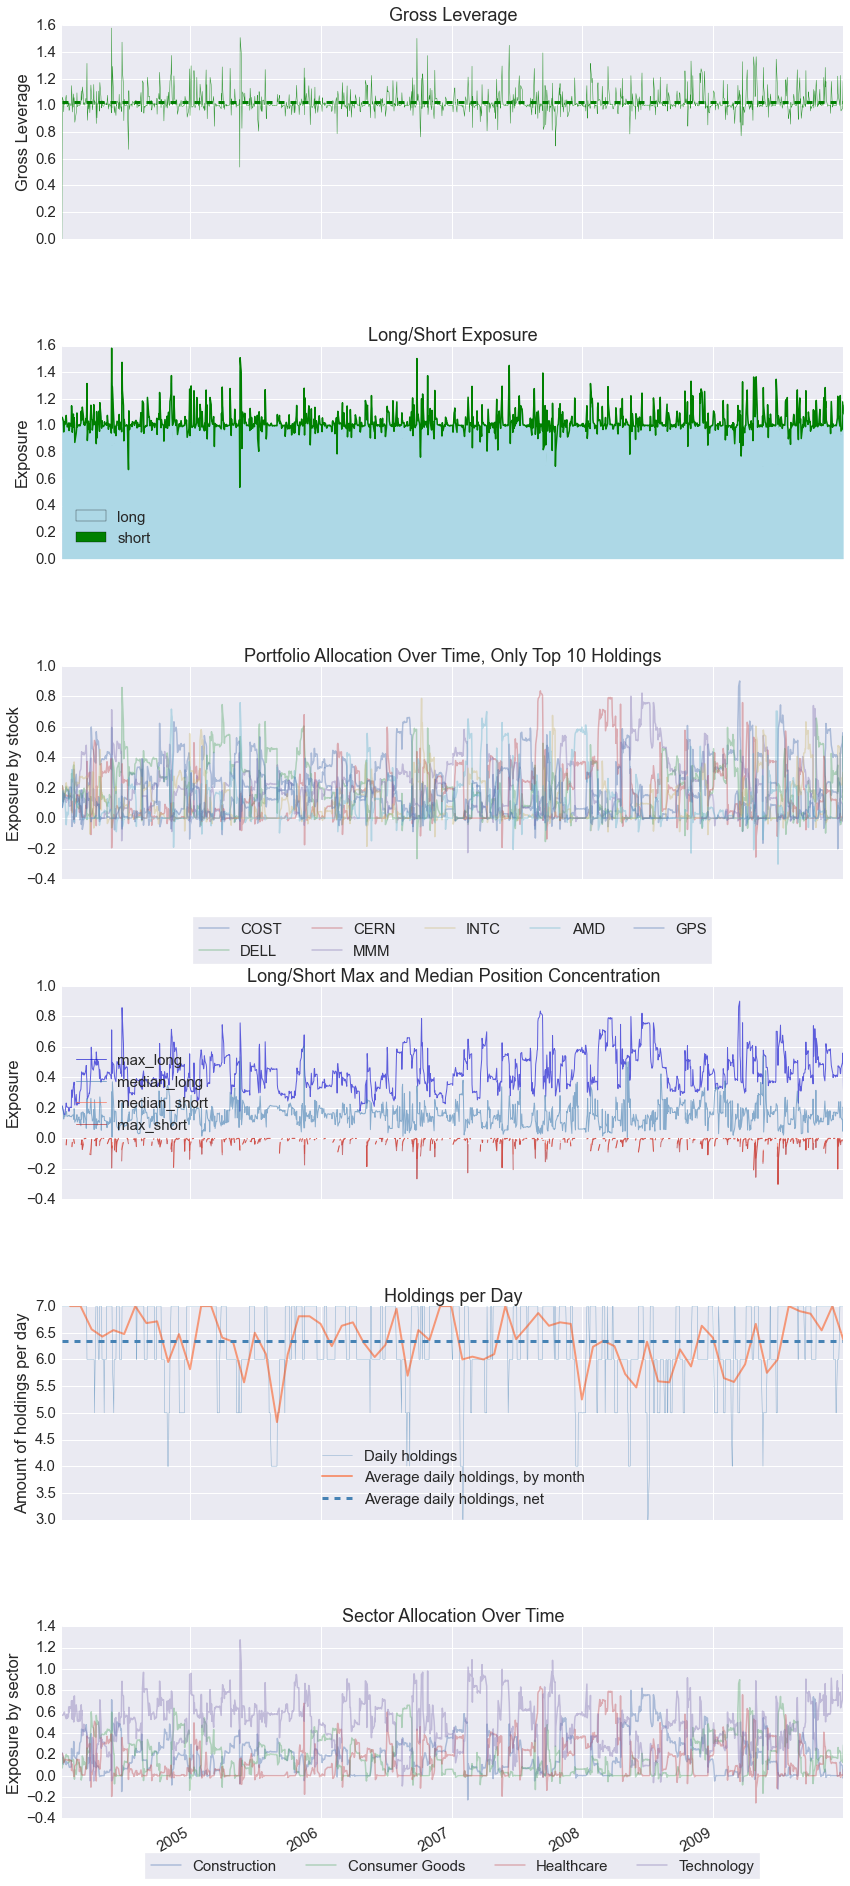

In [6]:
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)


                      duration           pnl      returns      long
count                     1430   1430.000000  1430.000000      1430
mean    9 days 16:40:56.154545     45.737238     0.003543  0.523077
std    22 days 02:16:41.165898   1616.537844     0.031288  0.499642
min            0 days 00:00:00 -30697.460000    -0.218045     False
25%            0 days 23:59:59     -5.773144    -0.011450         0
50%            2 days 23:59:59      0.871629     0.003885         1
75%            5 days 23:59:59     40.438366     0.018126         1
max          286 days 00:00:00  17835.869482     0.204385      True
Percent of round trips profitable = 57.2%
Mean return per winning round trip = 0.02181
Mean return per losing round trip = -0.02108
A decision is made every 1.053 days.
0.9495 trading decisions per day.
19.94 trading decisions per month.

Profitability (PnL / PnL total) per name:
symbol
COST    0.398964
INTC    0.382659
CERN    0.323077
MMM     0.221479
GPS     0.049385
AMD    -0.06409

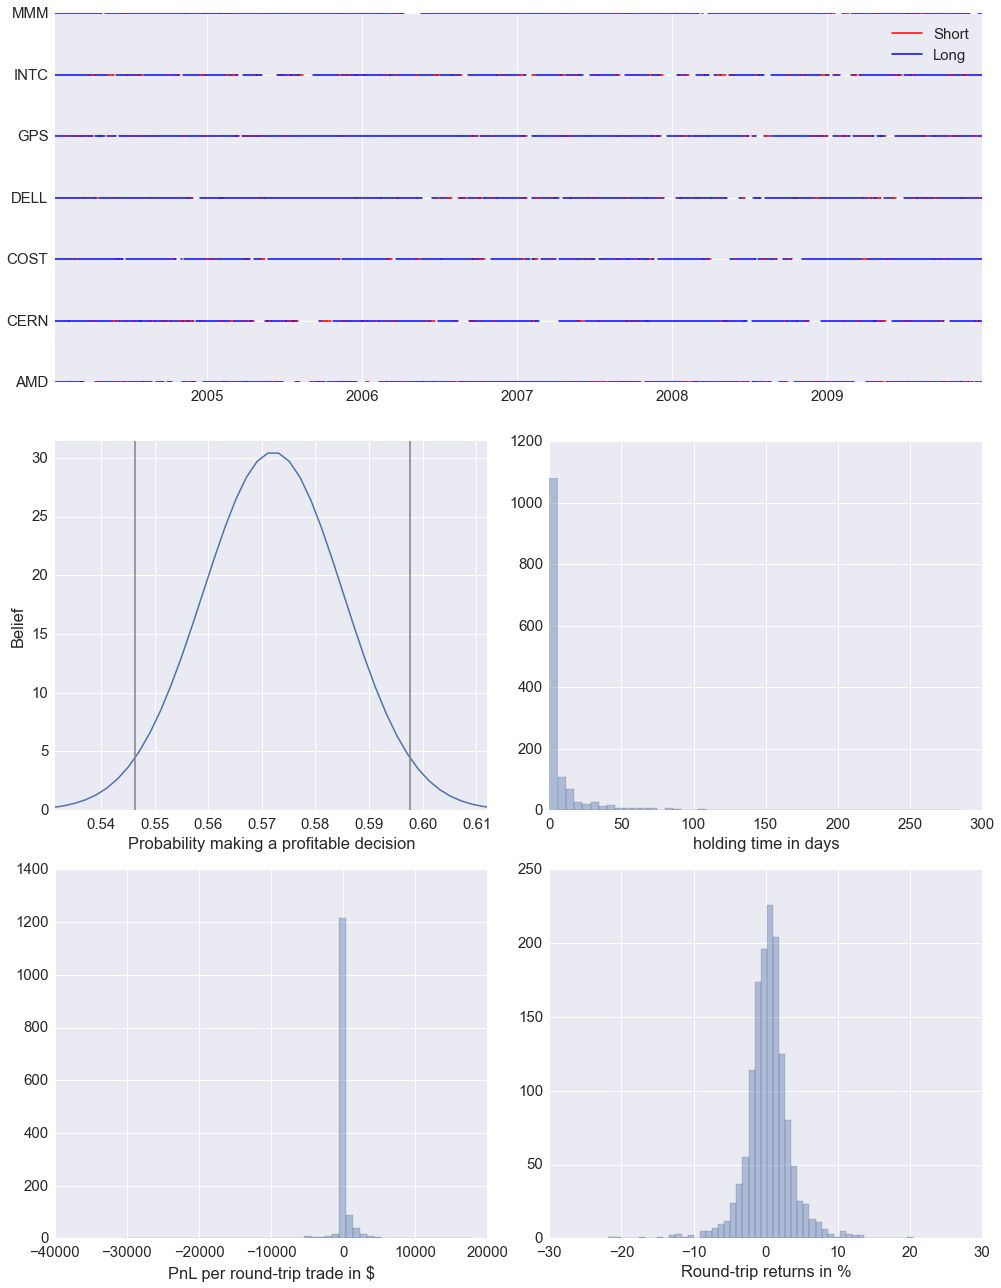

In [7]:
pf.create_round_trip_tear_sheet(positions, transactions, sector_mappings=sect_map)